# L.A (not so) Confidential - Data Science Capstone Project

The following Notebook shows the Python code used to classify neighbourhoods in downtown L.A. The goal of this notebook is to demonstrate the key skills acquired during the course including: importing appropriate libraries, importing data as a JSON file with Foursquare API, extracting data, cleaning data, visualising data and using an appropriate ML method (kmeans clustering) to classify the points of interest.

The results of this project are of use to anyone who would like to investigate the different businesses and amenities that downtown LA has on offer and see where they are located geographically. Such persons could be but are not limited to:

- A tourist visiting L.A who wants to see roughly how each area differs and what it contains.
- A businessman/businesswoman wanting to open up a new restaurant (for example) and would like to get a rough idea of each neighbourhood and what it contains.
- A researcher wanting to investigate the demographics of downtown LA by observing what kinds of businesses operate in the neighbourhoods.

It should be noted that the amount of clusters could vary from 2-10, depending on the diversity desired by the user for their purposes. For this lab, 4 clusters were selected to not make the results too varied and make visualisation of the results easier.

## Table of contents:
* [Download libraries](#first-bullet)
* [Foursquare API](#second-bullet)
* [Clean data](#third-bullet)
* [Initial test](#fourth-bullet)
* [Retrieve all points of interest in L.A neighbourhoods](#fifth-bullet)
* [Kmeans clustering](#sixth-bullet)
* [Investigate neighbourhoods](#seventh-bullet)

# Download Libraries <a class="anchor" id="first-bullet"></a>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import matplotlib.pyplot as plt

import time

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

## Foursquare API <a class="anchor" id="second-bullet"></a>

In [2]:
#CLIENT_ID =  Foursquare ID hidden 
#CLIENT_SECRET =  Foursquare Secret hidden
VERSION = '20180604'
LIMIT = 100
# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)


print("Done")

Done


In [3]:
# Find wikipedia page with LA Neighbourhoods
source = requests.get('https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_of_Los_Angeles').text
soup = BeautifulSoup(source, 'lxml')

#Web scrape to obtain neighbourhoods
Neighbourhoods = []
for content in soup.find_all('div', class_ = 'div-col columns column-width'):

    items = content.findAll('a')

    for item in items:
        Neighbourhoods.append(item.get('title'))

print(Neighbourhoods)
# print(len(Neighbourhoods))

['Angelino Heights, Los Angeles', None, 'Angeles Mesa, Los Angeles', 'Angelus Vista, Los Angeles', 'Arleta, Los Angeles', None, None, 'Arlington Heights, Los Angeles', None, 'Arts District, Los Angeles', None, 'Atwater Village, Los Angeles', None, 'Baldwin Hills, Los Angeles', None, 'Baldwin Hills/Crenshaw, Los Angeles', None, 'Baldwin Village, Los Angeles', None, 'Baldwin Vista, Los Angeles', None, 'Beachwood Canyon, Los Angeles', None, 'Bel Air, Los Angeles', None, None, 'Benedict Canyon, Los Angeles', None, 'Beverly Crest, Los Angeles', None, 'Beverly Glen, Los Angeles', None, 'Beverly Grove, Los Angeles', None, 'Beverly Hills Post Office', None, 'Beverly Park, Los Angeles', None, 'Beverlywood, Los Angeles', None, 'Boyle Heights, Los Angeles', None, None, 'Brentwood, Los Angeles', None, None, 'Brentwood Circle, Los Angeles', None, 'Brentwood Glen, Los Angeles', None, 'Broadway-Manchester, Los Angeles', None, 'Brookside, Los Angeles', 'Bunker Hill, Los Angeles', None, 'Cahuenga Pass'

## Clean Data <a class="anchor" id="third-bullet"></a>

In [4]:
res = []

#Remove 'None' values from Neighbourhoods
for i in Neighbourhoods:
    if i != None:
        res.append(i)
               
geolocator = Nominatim(user_agent = "Kyriacos")

test = res[0]
print(test)

location = geolocator.geocode(test)
print((location.latitude,location.longitude))

location = []

#Obtain location coordinates    
for i in res:
    nei = res[res.index(i)]
    location.append(geolocator.geocode(nei)) 

print(len(location))

location_updated = []
res_updated = []

        
for i in location:
    if i != None:
        location_updated.append(location[location.index(i)])
        res_updated.append(res[location.index(i)])        

#Assign clean data to original lists       
res = res_updated
location = location_updated
location_original = location

Angelino Heights, Los Angeles
(34.0702889, -118.2547965)
200


In [5]:
#Remove 'Los Angeles' parts of Neighbourhood names
for item in res:
    if item.endswith(', Los Angeles'): 
        res[res.index(item)] = item[:-13]

#Remove '(Los Angeles)' part of Neighbourhood names
for item in res:
    if item.endswith('(Los Angeles)'):
        res[res.index(item)] = item[:-14]
        
print(len(res))
print(len(location))

175
175


In [6]:
#Initialise 'latitude' and 'longitude' lists
print(location[0].latitude)
latitude = [0] * len(location)
longitude = [0] * len(location)

#Extract data from 'location' list
for i in range(0, len(location)):
    latitude[i] = location[i].latitude
    longitude[i] = location[i].longitude
    
#Create pandas dataframe    
df = pd.DataFrame({'Neighbourhoods': res, 'Latitude': latitude, 'Longitude': longitude})
df.sort_values('Neighbourhoods', ascending = False)
df.head()

34.0702889


,Neighbourhoods,Latitude,Longitude
0,Angelino Heights,34.070289,-118.254796
1,Angeles Mesa,33.991402,-118.319520
2,Arleta,34.241327,-118.432205
3,Arlington Heights,34.043494,-118.321374
4,Arts District,34.041239,-118.234450


Done


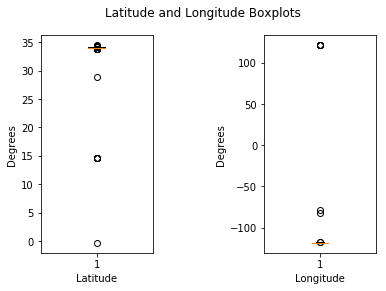

In [7]:
#Create box plots to spot outliers
data1 = latitude
data2 = longitude
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Latitude and Longitude Boxplots')
fig.subplots_adjust(wspace = 1)
ax1.boxplot(data1)
ax1.set_ylabel('Degrees')
ax1.set_xlabel('Latitude')
ax2.boxplot(data2)
ax2.set_ylabel('Degrees')
ax2.set_xlabel('Longitude')


print("Done")

In [8]:
#Display with folium to have a visual representation
loc = df[['Latitude', 'Longitude']]
loclist = loc.values.tolist()
len(loclist)
loclist[7]

map = folium.Map(location=[34.0522, -118.2437], zoom_start=8)
for point in range(0, len(loclist)):
    folium.Marker(loclist[point], popup=df['Neighbourhoods'][point]).add_to(map)
map

In [9]:
#See starting length of lists
print(len(latitude))
print(len(longitude))

#Initialise new lists
latitude_new = []
longitude_new = []
Neighbourhoods_new = []


#Exact bounds to eliminate outliers
upper_bound_lat = np.percentile(latitude,89)
upper_bound_lon = np.percentile(longitude,95)
lower_bound_lat = np.percentile(latitude,7)
lower_bound_lon = np.percentile(longitude,3)

#Eliminate outliers
for i in range(0,len(latitude)):
    if lower_bound_lat <= latitude[i] <= upper_bound_lat and lower_bound_lon <= longitude[i] <= upper_bound_lon:
        latitude_new.append(latitude[i])
        longitude_new.append(longitude[i])
        Neighbourhoods_new.append(res[i])
        
        
#Find new length of lists        
print(len(latitude_new))
print(len(longitude_new))        

#Re-write to original list names
latitude = latitude_new
longitude = longitude_new
res = Neighbourhoods_new

#Update pandas dataframe
df = pd.DataFrame({'Neighbourhoods': res, 'Latitude': latitude, 'Longitude': longitude})
df.sort_values('Neighbourhoods', ascending = False)
df.head()

175
175
138
138


,Neighbourhoods,Latitude,Longitude
0,Angelino Heights,34.070289,-118.254796
1,Angeles Mesa,33.991402,-118.319520
2,Arlington Heights,34.043494,-118.321374
3,Arts District,34.041239,-118.234450
4,Atwater Village,34.118698,-118.262392


Done


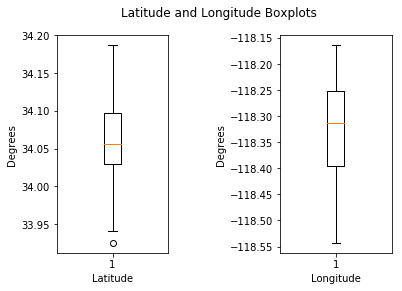

In [10]:
#New box plot having eliminated outliers
data1 = latitude
data2 = longitude
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Latitude and Longitude Boxplots')
fig.subplots_adjust(wspace = 1)
ax1.boxplot(data1)
ax1.set_ylabel('Degrees')
ax1.set_xlabel('Latitude')
ax2.boxplot(data2)
ax2.set_ylabel('Degrees')
ax2.set_xlabel('Longitude')


print("Done")

In [11]:
#Visualise Folium map with outliers removed
loc = df[['Latitude', 'Longitude']]
loclist = loc.values.tolist()
len(loclist)
loclist[7]

map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
for point in range(0, len(loclist)):
    folium.Marker(loclist[point], popup=df['Neighbourhoods'][point]).add_to(map)
map

## Initial test <a class="anchor" id="fourth-bullet"></a>

In [12]:
#Take first row from pandas dataframe which is 'Angelino Heights'
df_name = df.loc[0, 'Neighbourhoods'] # neighborhood name
df_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
df_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(df_name, 
                                                               df_latitude, 
                                                               df_longitude))

#Retrieve data for 'Angelino Heights'
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    df_latitude, 
    df_longitude, 
    radius, 
    LIMIT)
print("Success!")

Latitude and longitude values of Angelino Heights are 34.0702889, -118.2547965.
Success!


In [29]:
#Define function to extract venue category from json file
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#Import json file from API
results = requests.get(url).json()
#Access the venues
venues = results['response']['groups'][0]['items']
#Turn in to a table
nearby_venues = json_normalize(venues) 
#Define relevant columns for filtering data
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
#Filter the data
nearby_venues = nearby_venues.loc[:, filtered_columns]
#Add venue category to table
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Halliwell Manor,Performing Arts Venue,34.069329,-118.254165
1,Guisados,Taco Place,34.070262,-118.250437
2,Eightfold Coffee,Coffee Shop,34.071245,-118.250698
3,Ototo,Sake Bar,34.072659,-118.251740
4,"Michael Jackson's ""Thriller"" House (and Tree)",Historic Site,34.069557,-118.254599


## Retrieve all points of interest in L.A neighbourhoods <a class="anchor" id="fifth-bullet"></a>

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        #Save to pandas dataframe
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
#Create dataframe of all venues in LA
LA_venues = getNearbyVenues(names = df['Neighbourhoods'],
                                   latitudes = df['Latitude'],
                                   longitudes = df['Longitude']
                                  )

Angelino Heights
Angeles Mesa
Arlington Heights
Arts District
Atwater Village
Baldwin Hills
Baldwin Hills/Crenshaw
Baldwin Village
Beachwood Canyon
Bel Air
Benedict Canyon
Beverly Crest
Beverly Glen
Beverly Grove
Beverly Park
Beverlywood
Boyle Heights
Brentwood
Brentwood
Broadway-Manchester
Bunker Hill
Cahuenga Pass
Harvard Park
Carthay
Central-Alameda
Downtown Los Angeles
Century City
Chesterfield Square
Cheviot Hills
Chinatown
Civic Center
Crenshaw
Crestwood Hills
Cypress Park
Del Rey
Downtown Los Angeles
Eagle Rock
East Hollywood
East Los Angeles, California
Echo Park
Edendale
El Sereno
Elysian Heights
Elysian Park
Elysian Valley
Encino
Exposition Park
Fashion District
Financial District
Florence
Los Angeles Flower District
Gallery Row
Garvanza
Glassell Park
Gramercy Park
Green Meadows
Griffith Park
Hancock Park
Harvard Heights
Harvard Park
Hermon
Highland Park
Historic Core
Hollywood
Hollywood Hills
Hollywood Hills West
Hyde Park
Jefferson Park
Jewelry District
Koreatown
Ladera
Lak

In [30]:
print(LA_venues.shape)
LA_venues.head(4)

(3357, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Angelino Heights,34.070289,-118.254796,Halliwell Manor,34.069329,-118.254165,Performing Arts Venue
1,Angelino Heights,34.070289,-118.254796,Guisados,34.070262,-118.250437,Taco Place
2,Angelino Heights,34.070289,-118.254796,Eightfold Coffee,34.071245,-118.250698,Coffee Shop
3,Angelino Heights,34.070289,-118.254796,Ototo,34.072659,-118.251740,Sake Bar


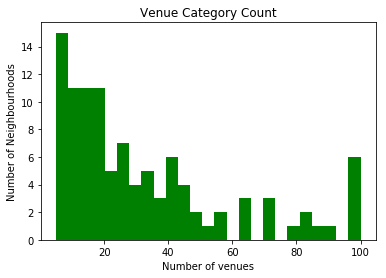

,Neighbourhood,Venue Category Count
0,Angeles Mesa,7
1,Angelino Heights,25
2,Arlington Heights,9
3,Arts District,34
4,Atwater Village,42


In [31]:
LA_venues_count = LA_venues.groupby('Neighbourhood').count().reset_index()
LA_venues_count = LA_venues_count[['Neighbourhood', 'Venue Category']]
LA_venues_count.columns = ['Neighbourhood', 'Venue Category Count']

plt.hist(LA_venues_count['Venue Category Count'], bins = 25, color = "Green")
plt.title("Venue Category Count")
plt.xlabel("Number of venues")
plt.ylabel("Number of Neighbourhoods")
plt.show()

LA_venues_count.head()

In [18]:
filt = LA_venues_count['Venue Category Count'] > 4
LA_filt = LA_venues_count[filt]
neigh_list = LA_filt['Neighbourhood']
neigh_list = LA_filt['Neighbourhood'].tolist()
print(neigh_list)
print(len(neigh_list))
filt = LA_venues['Neighbourhood'].isin(neigh_list)
LA_venues = LA_venues.loc[filt]
LA_venues.head()

['Angeles Mesa', 'Angelino Heights', 'Arlington Heights', 'Arts District', 'Atwater Village', 'Baldwin Hills', 'Baldwin Village', 'Beachwood Canyon', 'Beverly Grove', 'Beverly Park', 'Boyle Heights', 'Brentwood', 'Bunker Hill', 'Cahuenga Pass', 'Carthay', 'Century City', 'Chinatown', 'Civic Center', 'Crenshaw', 'Crestwood Hills', 'Cypress Park', 'Del Rey', 'Downtown Los Angeles', 'Eagle Rock', 'East Hollywood', 'East Los Angeles, California', 'Echo Park', 'Edendale', 'El Sereno', 'Elysian Heights', 'Elysian Park', 'Elysian Valley', 'Encino', 'Exposition Park', 'Fashion District', 'Financial District', 'Florence', 'Gallery Row', 'Garvanza', 'Glassell Park', 'Green Meadows', 'Harvard Heights', 'Hermon', 'Highland Park', 'Historic Core', 'Historic South Central Los Angeles', 'Hollywood', 'Hyde Park', 'Jefferson Park', 'Jewelry District', 'Koreatown', 'Lake Balboa', 'Larchmont', 'Laurel Canyon', 'Leimert Park', 'Lincoln Heights', 'Little Armenia', 'Little Tokyo', 'Los Angeles Flower Distri

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Angelino Heights,34.070289,-118.254796,Halliwell Manor,34.069329,-118.254165,Performing Arts Venue
1,Angelino Heights,34.070289,-118.254796,Guisados,34.070262,-118.250437,Taco Place
2,Angelino Heights,34.070289,-118.254796,Eightfold Coffee,34.071245,-118.250698,Coffee Shop
3,Angelino Heights,34.070289,-118.254796,Ototo,34.072659,-118.251740,Sake Bar
4,Angelino Heights,34.070289,-118.254796,"Michael Jackson's ""Thriller"" House (and Tree)",34.069557,-118.254599,Historic Site


In [19]:
#One hot encoding
LA_onehot = pd.get_dummies(LA_venues["Venue Category"])
LA_onehot["Neighbourhood"] = LA_venues["Neighbourhood"]
LA_onehot["Latitude"] = LA_venues["Neighbourhood Latitude"]
LA_onehot["Longitude"] = LA_venues["Neighbourhood Longitude"]
cols = list(LA_onehot.columns)
cols = [cols[-1]] + cols[:-1]
cols = [cols[-1]] + cols[:-1]
LA_onehot = LA_onehot[cols]

LA_grouped = LA_onehot.groupby(by = "Neighbourhood").mean()
LA_grouped

,Latitude,Longitude,ATM,Accessories Store,Adult Boutique,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Aquarium,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Angeles Mesa,33.991402,-118.319520,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.0
Angelino Heights,34.070289,-118.254796,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Arlington Heights,34.043494,-118.321374,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Arts District,34.041239,-118.234450,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Atwater Village,34.118698,-118.262392,0.000000,0.000000,0.000,0.00000,0.000000,0.023810,0.0,0.0,...,0.000000,0.000000,0.047619,0.0,0.023810,0.000000,0.000000,0.000000,0.000000,0.0
Baldwin Hills,34.010989,-118.337071,0.000000,0.025641,0.000,0.00000,0.000000,0.000000,0.0,0.0,...,0.025641,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.000000,0.0
Baldwin Village,34.019456,-118.345910,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Beachwood Canyon,34.122292,-118.321385,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Beverly Grove,34.076034,-118.369972,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## Kmeans clustering <a class="anchor" id="sixth-bullet"></a>

In [20]:
# set number of clusters
kclusters = 4

type(LA_grouped)

LA_kmeans = LA_grouped.drop(["Latitude", "Longitude"], axis = 1)
LA_kmeans.head()

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_kmeans)
kmeans_array = kmeans.labels_
# check cluster labels generated for each row in the dataframe
print(kmeans_array.tolist())
print(len(kmeans_array))

[3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
104


In [21]:
LA_map = LA_grouped.drop(LA_grouped.iloc[:, 2:], axis = 1)
clusters = pd.DataFrame(kmeans_array)
clusters.columns = ["Clusters"]

clusters.head()

,Clusters
0,3
1,0
2,0
3,0
4,0


In [22]:
loc = LA_map[['Latitude', 'Longitude']]
loclist = loc.values.tolist()
len(loclist)

cluster =  clusters["Clusters"].values.tolist()

colours = ['red','blue','green', 'purple', 'orange']



map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
for point in range(0, len(loclist)):
    folium.CircleMarker(loclist[point],
            radius=2,
            color=colours[cluster[point]],
            fill_color=colours[cluster[point]],
           ).add_to(map)
map

## Investigate neighbourhoods <a class="anchor" id="seventh-bullet"></a>

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False).to_frame().reset_index()
    row_cutoff = row_categories_sorted.head(num_top_venues)
    row_cutoff.columns = ['Venue', 'Appears']
    return_array = row_cutoff['Venue'].where(row_cutoff['Appears'] != 0, other = np.NaN, axis = 0)

    return return_array.values

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Neighbourhood'] = LA_kmeans.index

for ind in np.arange(LA_kmeans.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_kmeans.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Angeles Mesa,Playground,Fast Food Restaurant,Deli / Bodega,Wine Bar,Pet Store,Restaurant,NaN,NaN,NaN,NaN
1,Angelino Heights,Mexican Restaurant,Taco Place,Performing Arts Venue,Motel,Food Truck,Breakfast Spot,Boxing Gym,Sculpture Garden,Cocktail Bar,Coffee Shop
2,Arlington Heights,Donut Shop,Shop & Service,Food,Convenience Store,Rental Car Location,Restaurant,Art Gallery,Latin American Restaurant,Café,NaN
3,Arts District,Coffee Shop,Art Gallery,Italian Restaurant,Bookstore,Cocktail Bar,Café,Brewery,Gym / Fitness Center,Mediterranean Restaurant,Beer Garden
4,Atwater Village,Pizza Place,Vietnamese Restaurant,Coffee Shop,Liquor Store,Pet Store,Nightclub,Record Shop,Latin American Restaurant,Taco Place,Restaurant


In [25]:
# add clustering labels
try:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', cluster)
except:
    pass


LA_common_venues = neighborhoods_venues_sorted
LA_common_venues.head()

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Angeles Mesa,Playground,Fast Food Restaurant,Deli / Bodega,Wine Bar,Pet Store,Restaurant,NaN,NaN,NaN,NaN
1,0,Angelino Heights,Mexican Restaurant,Taco Place,Performing Arts Venue,Motel,Food Truck,Breakfast Spot,Boxing Gym,Sculpture Garden,Cocktail Bar,Coffee Shop
2,0,Arlington Heights,Donut Shop,Shop & Service,Food,Convenience Store,Rental Car Location,Restaurant,Art Gallery,Latin American Restaurant,Café,NaN
3,0,Arts District,Coffee Shop,Art Gallery,Italian Restaurant,Bookstore,Cocktail Bar,Café,Brewery,Gym / Fitness Center,Mediterranean Restaurant,Beer Garden
4,0,Atwater Village,Pizza Place,Vietnamese Restaurant,Coffee Shop,Liquor Store,Pet Store,Nightclub,Record Shop,Latin American Restaurant,Taco Place,Restaurant


In [26]:
#Retrieve most common venues
def total_venue_categories(df):
    df_all_venues = df['1st Most Common Venue']
    df_all_venues = df_all_venues.append(df['2nd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['3rd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['4th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['5th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['6th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['7th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['8th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['9th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['10th Most Common Venue'])
    df_cnt = df_all_venues.value_counts().to_frame().reset_index()
    df_cnt.columns = ['Venue Category', 'Venue Count']
    df_cnt.sort_values(by = 'Venue Count', ascending = False)
#return the top 10 venue categories
    return df_cnt.head(10)

Done version 0
Done version 1
Done version 2
Done version 3


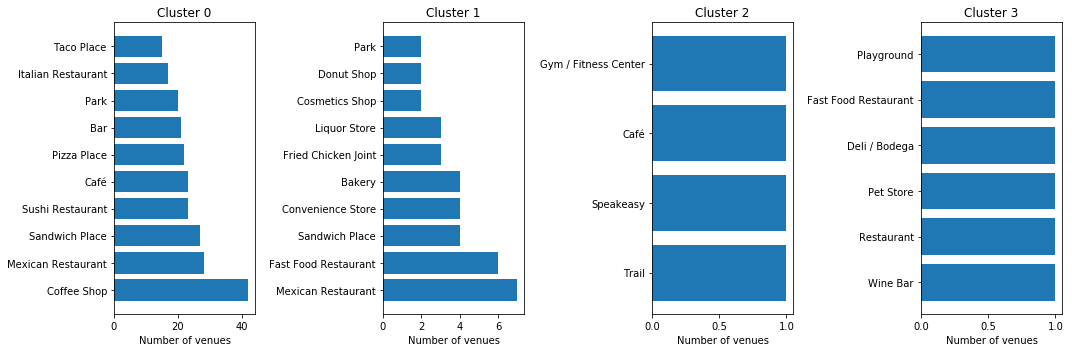

In [27]:
def plots(i):
    var = 'cluster' + str(i)
    var = total_venue_categories(LA_common_venues[LA_common_venues['Cluster Labels'] == i])
    y_pos = np.arange(len(var['Venue Category']))
    y_ticks = var["Venue Category"].tolist()
    axes[i].barh(y_pos, var['Venue Count'], align='center')
    axes[i].title.set_text('Cluster ' + str(i))
    axes[i].set_yticks(y_pos)
    axes[i].set_yticklabels(y_ticks)
    axes[i].set_xlabel("Number of venues")
    print("Done version " + str(i))
    


figure, axes = plt.subplots(1,4, figsize= (15,5))


for i in range(0,kclusters):
    plots(i)

figure.tight_layout()

In [28]:
# #count venue categories in all neighborhoods in the cluster
# t0 = total_venue_categories(LA_common_venues[LA_common_venues['Cluster Labels'] == 0])

# y_pos = np.arange(len(t0['Venue Category']))
# plt.barh(y_pos, t0['Venue Count'], align='center')
# plt.yticks(y_pos, t0['Venue Category'])
# plt.xlabel('Number of venue categories')
# plt.title('Venue categories in cluster 0')
 
# plt.show()